In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataTrainingAwal = pd.read_csv("DataTrainingAwal.csv")
dataTrainingAwal.head(20)


dataTrainingCopy = pd.read_csv("DataTrainingCopy.csv")
y_train = dataTrainingCopy['target']
x_train = dataTrainingCopy.drop(labels =['target'],axis=1)

ohe = OneHotEncoder()
le = LabelEncoder()

cols = x_train.columns.values
for col in cols:
    x_train[col] = le.fit_transform(x_train[col])

y_train = le.fit_transform(y_train)

ohe = OneHotEncoder()
x_train = ohe.fit_transform(x_train).toarray()
sc = StandardScaler()
x_train = sc.fit_transform(x_train)


x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size = 0.30, random_state = 42)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size = 0.50, random_state = 42)

In [33]:
dataTrainingAwal.columns
dataTrainingAwal.info()
dataTrainingAwal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               492 non-null    object
 1   DATOP            492 non-null    object
 2   FLTID            492 non-null    object
 3   DEPSTN           492 non-null    object
 4   ARRSTN           492 non-null    object
 5   STD              492 non-null    object
 6   STA              492 non-null    object
 7   STATUS           492 non-null    object
 8   AC               492 non-null    object
 9   target           492 non-null    int64 
 10  target category  492 non-null    object
 11  Duration         492 non-null    object
dtypes: int64(1), object(11)
memory usage: 46.2+ KB


,target
count,492.000000
mean,28.804878
std,106.006084
min,0.000000
25%,0.000000
50%,10.000000
75%,25.000000
max,1738.000000


In [34]:
for col in dataTrainingAwal.columns:
    if dataTrainingAwal[col].dtype == 'object':
        print(f'Unique values in column {col}: {dataTrainingAwal[col].unique()}')

Unique values in column ID: ['train_id_7' 'train_id_10' 'train_id_11' 'train_id_16' 'train_id_19'
 'train_id_20' 'train_id_26' 'train_id_31' 'train_id_36' 'train_id_42'
 'train_id_43' 'train_id_45' 'train_id_46' 'train_id_53' 'train_id_54'
 'train_id_56' 'train_id_60' 'train_id_65' 'train_id_70' 'train_id_71'
 'train_id_72' 'train_id_94' 'train_id_95' 'train_id_96' 'train_id_110'
 'train_id_111' 'train_id_112' 'train_id_118' 'train_id_119'
 'train_id_120' 'train_id_128' 'train_id_142' 'train_id_145'
 'train_id_147' 'train_id_148' 'train_id_150' 'train_id_157'
 'train_id_159' 'train_id_160' 'train_id_164' 'train_id_173'
 'train_id_177' 'train_id_178' 'train_id_183' 'train_id_184'
 'train_id_189' 'train_id_192' 'train_id_195' 'train_id_196'
 'train_id_198' 'train_id_199' 'train_id_200' 'train_id_202'
 'train_id_205' 'train_id_207' 'train_id_208' 'train_id_214'
 'train_id_215' 'train_id_217' 'train_id_218' 'train_id_220'
 'train_id_221' 'train_id_222' 'train_id_223' 'train_id_224'
 'train

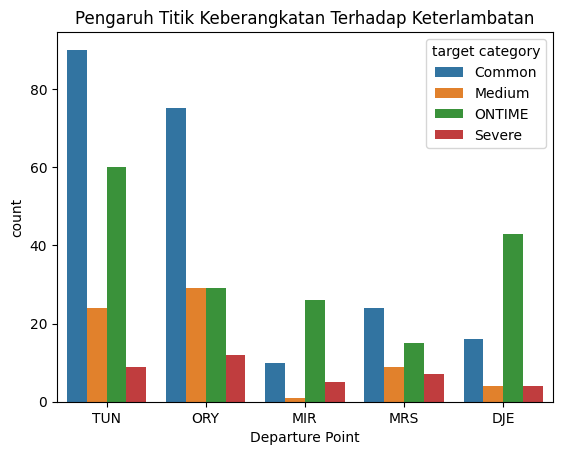

In [35]:
sns.countplot(x="DEPSTN", hue="target category", data=dataTrainingAwal)
plt.xlabel("Departure Point")
plt.title("Pengaruh Titik Keberangkatan Terhadap Keterlambatan")
plt.show()

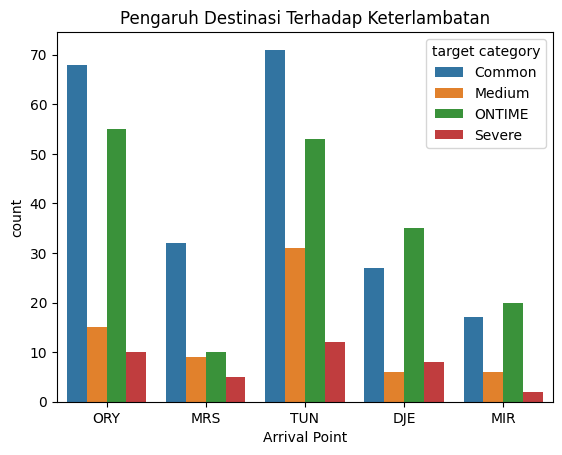

In [37]:
sns.countplot(x="ARRSTN", hue="target category", data=dataTrainingAwal)
plt.xlabel("Arrival Point")
plt.title("Pengaruh Destinasi Terhadap Keterlambatan")
plt.show()

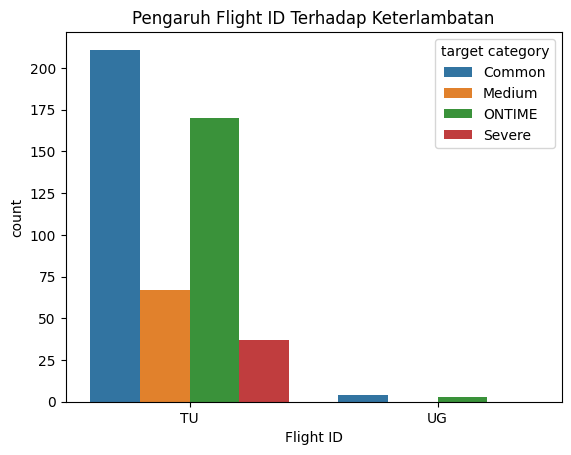

In [38]:
sns.countplot(x="FLTID", hue="target category", data=dataTrainingAwal)
plt.xlabel("Flight ID")
plt.title("Pengaruh Flight ID Terhadap Keterlambatan")
plt.show()

In [40]:
import random

def fitnessValue(x,y,z):
    return x + y + z

#generate solutions
solutions = []
for index,row in dataTrainingCopy.iterrows():
    fitness = fitnessValue(row["DEPSTN"],row["ARRSTN"],row["FLTID"])
    solutions.append( (row["DEPSTN"],row["ARRSTN"],row["FLTID"],fitness) )
    
solutions.sort()
solutions.reverse()
print(solutions[:20])

[(63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 44, 34, 141), (63, 37, 34, 134), (63, 37, 34, 134), (63, 37, 34, 134), (63, 37, 34, 134), (63, 37, 34, 134), (63, 37, 34, 134)]


In [41]:
for i in range(10000):
    
    rankedSolutions = []
    for s in solutions:
        rankedSolutions.append( (s[0]) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
                               
    print(f"===== Gen {i} ===== Best Solutions")
    print(rankedSolutions[0])
    
#     bestSolutions = rankedSolutions[:100]
                               
#     elements = []
                               
#     for s in bestSolutions:
#         elements.append()
                               

===== Gen 0 ===== Best Solutions
63
===== Gen 1 ===== Best Solutions
63
===== Gen 2 ===== Best Solutions
63
===== Gen 3 ===== Best Solutions
63
===== Gen 4 ===== Best Solutions
63
===== Gen 5 ===== Best Solutions
63
===== Gen 6 ===== Best Solutions
63
===== Gen 7 ===== Best Solutions
63
===== Gen 8 ===== Best Solutions
63
===== Gen 9 ===== Best Solutions
63
===== Gen 10 ===== Best Solutions
63
===== Gen 11 ===== Best Solutions
63
===== Gen 12 ===== Best Solutions
63
===== Gen 13 ===== Best Solutions
63
===== Gen 14 ===== Best Solutions
63
===== Gen 15 ===== Best Solutions
63
===== Gen 16 ===== Best Solutions
63
===== Gen 17 ===== Best Solutions
63
===== Gen 18 ===== Best Solutions
63
===== Gen 19 ===== Best Solutions
63
===== Gen 20 ===== Best Solutions
63
===== Gen 21 ===== Best Solutions
63
===== Gen 22 ===== Best Solutions
63
===== Gen 23 ===== Best Solutions
63
===== Gen 24 ===== Best Solutions
63
===== Gen 25 ===== Best Solutions
63
===== Gen 26 ===== Best Solutions
63
===== Gen 2

===== Gen 1536 ===== Best Solutions
63
===== Gen 1537 ===== Best Solutions
63
===== Gen 1538 ===== Best Solutions
63
===== Gen 1539 ===== Best Solutions
63
===== Gen 1540 ===== Best Solutions
63
===== Gen 1541 ===== Best Solutions
63
===== Gen 1542 ===== Best Solutions
63
===== Gen 1543 ===== Best Solutions
63
===== Gen 1544 ===== Best Solutions
63
===== Gen 1545 ===== Best Solutions
63
===== Gen 1546 ===== Best Solutions
63
===== Gen 1547 ===== Best Solutions
63
===== Gen 1548 ===== Best Solutions
63
===== Gen 1549 ===== Best Solutions
63
===== Gen 1550 ===== Best Solutions
63
===== Gen 1551 ===== Best Solutions
63
===== Gen 1552 ===== Best Solutions
63
===== Gen 1553 ===== Best Solutions
63
===== Gen 1554 ===== Best Solutions
63
===== Gen 1555 ===== Best Solutions
63
===== Gen 1556 ===== Best Solutions
63
===== Gen 1557 ===== Best Solutions
63
===== Gen 1558 ===== Best Solutions
63
===== Gen 1559 ===== Best Solutions
63
===== Gen 1560 ===== Best Solutions
63
===== Gen 1561 ===== Best

===== Gen 2551 ===== Best Solutions
63
===== Gen 2552 ===== Best Solutions
63
===== Gen 2553 ===== Best Solutions
63
===== Gen 2554 ===== Best Solutions
63
===== Gen 2555 ===== Best Solutions
63
===== Gen 2556 ===== Best Solutions
63
===== Gen 2557 ===== Best Solutions
63
===== Gen 2558 ===== Best Solutions
63
===== Gen 2559 ===== Best Solutions
63
===== Gen 2560 ===== Best Solutions
63
===== Gen 2561 ===== Best Solutions
63
===== Gen 2562 ===== Best Solutions
63
===== Gen 2563 ===== Best Solutions
63
===== Gen 2564 ===== Best Solutions
63
===== Gen 2565 ===== Best Solutions
63
===== Gen 2566 ===== Best Solutions
63
===== Gen 2567 ===== Best Solutions
63
===== Gen 2568 ===== Best Solutions
63
===== Gen 2569 ===== Best Solutions
63
===== Gen 2570 ===== Best Solutions
63
===== Gen 2571 ===== Best Solutions
63
===== Gen 2572 ===== Best Solutions
63
===== Gen 2573 ===== Best Solutions
63
===== Gen 2574 ===== Best Solutions
63
===== Gen 2575 ===== Best Solutions
63
===== Gen 2576 ===== Best

===== Gen 3416 ===== Best Solutions
63
===== Gen 3417 ===== Best Solutions
63
===== Gen 3418 ===== Best Solutions
63
===== Gen 3419 ===== Best Solutions
63
===== Gen 3420 ===== Best Solutions
63
===== Gen 3421 ===== Best Solutions
63
===== Gen 3422 ===== Best Solutions
63
===== Gen 3423 ===== Best Solutions
63
===== Gen 3424 ===== Best Solutions
63
===== Gen 3425 ===== Best Solutions
63
===== Gen 3426 ===== Best Solutions
63
===== Gen 3427 ===== Best Solutions
63
===== Gen 3428 ===== Best Solutions
63
===== Gen 3429 ===== Best Solutions
63
===== Gen 3430 ===== Best Solutions
63
===== Gen 3431 ===== Best Solutions
63
===== Gen 3432 ===== Best Solutions
63
===== Gen 3433 ===== Best Solutions
63
===== Gen 3434 ===== Best Solutions
63
===== Gen 3435 ===== Best Solutions
63
===== Gen 3436 ===== Best Solutions
63
===== Gen 3437 ===== Best Solutions
63
===== Gen 3438 ===== Best Solutions
63
===== Gen 3439 ===== Best Solutions
63
===== Gen 3440 ===== Best Solutions
63
===== Gen 3441 ===== Best

===== Gen 3979 ===== Best Solutions
63
===== Gen 3980 ===== Best Solutions
63
===== Gen 3981 ===== Best Solutions
63
===== Gen 3982 ===== Best Solutions
63
===== Gen 3983 ===== Best Solutions
63
===== Gen 3984 ===== Best Solutions
63
===== Gen 3985 ===== Best Solutions
63
===== Gen 3986 ===== Best Solutions
63
===== Gen 3987 ===== Best Solutions
63
===== Gen 3988 ===== Best Solutions
63
===== Gen 3989 ===== Best Solutions
63
===== Gen 3990 ===== Best Solutions
63
===== Gen 3991 ===== Best Solutions
63
===== Gen 3992 ===== Best Solutions
63
===== Gen 3993 ===== Best Solutions
63
===== Gen 3994 ===== Best Solutions
63
===== Gen 3995 ===== Best Solutions
63
===== Gen 3996 ===== Best Solutions
63
===== Gen 3997 ===== Best Solutions
63
===== Gen 3998 ===== Best Solutions
63
===== Gen 3999 ===== Best Solutions
63
===== Gen 4000 ===== Best Solutions
63
===== Gen 4001 ===== Best Solutions
63
===== Gen 4002 ===== Best Solutions
63
===== Gen 4003 ===== Best Solutions
63
===== Gen 4004 ===== Best

===== Gen 4878 ===== Best Solutions
63
===== Gen 4879 ===== Best Solutions
63
===== Gen 4880 ===== Best Solutions
63
===== Gen 4881 ===== Best Solutions
63
===== Gen 4882 ===== Best Solutions
63
===== Gen 4883 ===== Best Solutions
63
===== Gen 4884 ===== Best Solutions
63
===== Gen 4885 ===== Best Solutions
63
===== Gen 4886 ===== Best Solutions
63
===== Gen 4887 ===== Best Solutions
63
===== Gen 4888 ===== Best Solutions
63
===== Gen 4889 ===== Best Solutions
63
===== Gen 4890 ===== Best Solutions
63
===== Gen 4891 ===== Best Solutions
63
===== Gen 4892 ===== Best Solutions
63
===== Gen 4893 ===== Best Solutions
63
===== Gen 4894 ===== Best Solutions
63
===== Gen 4895 ===== Best Solutions
63
===== Gen 4896 ===== Best Solutions
63
===== Gen 4897 ===== Best Solutions
63
===== Gen 4898 ===== Best Solutions
63
===== Gen 4899 ===== Best Solutions
63
===== Gen 4900 ===== Best Solutions
63
===== Gen 4901 ===== Best Solutions
63
===== Gen 4902 ===== Best Solutions
63
===== Gen 4903 ===== Best

===== Gen 5977 ===== Best Solutions
63
===== Gen 5978 ===== Best Solutions
63
===== Gen 5979 ===== Best Solutions
63
===== Gen 5980 ===== Best Solutions
63
===== Gen 5981 ===== Best Solutions
63
===== Gen 5982 ===== Best Solutions
63
===== Gen 5983 ===== Best Solutions
63
===== Gen 5984 ===== Best Solutions
63
===== Gen 5985 ===== Best Solutions
63
===== Gen 5986 ===== Best Solutions
63
===== Gen 5987 ===== Best Solutions
63
===== Gen 5988 ===== Best Solutions
63
===== Gen 5989 ===== Best Solutions
63
===== Gen 5990 ===== Best Solutions
63
===== Gen 5991 ===== Best Solutions
63
===== Gen 5992 ===== Best Solutions
63
===== Gen 5993 ===== Best Solutions
63
===== Gen 5994 ===== Best Solutions
63
===== Gen 5995 ===== Best Solutions
63
===== Gen 5996 ===== Best Solutions
63
===== Gen 5997 ===== Best Solutions
63
===== Gen 5998 ===== Best Solutions
63
===== Gen 5999 ===== Best Solutions
63
===== Gen 6000 ===== Best Solutions
63
===== Gen 6001 ===== Best Solutions
63
===== Gen 6002 ===== Best

63
===== Gen 6916 ===== Best Solutions
63
===== Gen 6917 ===== Best Solutions
63
===== Gen 6918 ===== Best Solutions
63
===== Gen 6919 ===== Best Solutions
63
===== Gen 6920 ===== Best Solutions
63
===== Gen 6921 ===== Best Solutions
63
===== Gen 6922 ===== Best Solutions
63
===== Gen 6923 ===== Best Solutions
63
===== Gen 6924 ===== Best Solutions
63
===== Gen 6925 ===== Best Solutions
63
===== Gen 6926 ===== Best Solutions
63
===== Gen 6927 ===== Best Solutions
63
===== Gen 6928 ===== Best Solutions
63
===== Gen 6929 ===== Best Solutions
63
===== Gen 6930 ===== Best Solutions
63
===== Gen 6931 ===== Best Solutions
63
===== Gen 6932 ===== Best Solutions
63
===== Gen 6933 ===== Best Solutions
63
===== Gen 6934 ===== Best Solutions
63
===== Gen 6935 ===== Best Solutions
63
===== Gen 6936 ===== Best Solutions
63
===== Gen 6937 ===== Best Solutions
63
===== Gen 6938 ===== Best Solutions
63
===== Gen 6939 ===== Best Solutions
63
===== Gen 6940 ===== Best Solutions
63
===== Gen 6941 ===== B

===== Gen 7824 ===== Best Solutions
63
===== Gen 7825 ===== Best Solutions
63
===== Gen 7826 ===== Best Solutions
63
===== Gen 7827 ===== Best Solutions
63
===== Gen 7828 ===== Best Solutions
63
===== Gen 7829 ===== Best Solutions
63
===== Gen 7830 ===== Best Solutions
63
===== Gen 7831 ===== Best Solutions
63
===== Gen 7832 ===== Best Solutions
63
===== Gen 7833 ===== Best Solutions
63
===== Gen 7834 ===== Best Solutions
63
===== Gen 7835 ===== Best Solutions
63
===== Gen 7836 ===== Best Solutions
63
===== Gen 7837 ===== Best Solutions
63
===== Gen 7838 ===== Best Solutions
63
===== Gen 7839 ===== Best Solutions
63
===== Gen 7840 ===== Best Solutions
63
===== Gen 7841 ===== Best Solutions
63
===== Gen 7842 ===== Best Solutions
63
===== Gen 7843 ===== Best Solutions
63
===== Gen 7844 ===== Best Solutions
63
===== Gen 7845 ===== Best Solutions
63
===== Gen 7846 ===== Best Solutions
63
===== Gen 7847 ===== Best Solutions
63
===== Gen 7848 ===== Best Solutions
63
===== Gen 7849 ===== Best

===== Gen 8725 ===== Best Solutions
63
===== Gen 8726 ===== Best Solutions
63
===== Gen 8727 ===== Best Solutions
63
===== Gen 8728 ===== Best Solutions
63
===== Gen 8729 ===== Best Solutions
63
===== Gen 8730 ===== Best Solutions
63
===== Gen 8731 ===== Best Solutions
63
===== Gen 8732 ===== Best Solutions
63
===== Gen 8733 ===== Best Solutions
63
===== Gen 8734 ===== Best Solutions
63
===== Gen 8735 ===== Best Solutions
63
===== Gen 8736 ===== Best Solutions
63
===== Gen 8737 ===== Best Solutions
63
===== Gen 8738 ===== Best Solutions
63
===== Gen 8739 ===== Best Solutions
63
===== Gen 8740 ===== Best Solutions
63
===== Gen 8741 ===== Best Solutions
63
===== Gen 8742 ===== Best Solutions
63
===== Gen 8743 ===== Best Solutions
63
===== Gen 8744 ===== Best Solutions
63
===== Gen 8745 ===== Best Solutions
63
===== Gen 8746 ===== Best Solutions
63
===== Gen 8747 ===== Best Solutions
63
===== Gen 8748 ===== Best Solutions
63
===== Gen 8749 ===== Best Solutions
63
===== Gen 8750 ===== Best

63
===== Gen 9562 ===== Best Solutions
63
===== Gen 9563 ===== Best Solutions
63
===== Gen 9564 ===== Best Solutions
63
===== Gen 9565 ===== Best Solutions
63
===== Gen 9566 ===== Best Solutions
63
===== Gen 9567 ===== Best Solutions
63
===== Gen 9568 ===== Best Solutions
63
===== Gen 9569 ===== Best Solutions
63
===== Gen 9570 ===== Best Solutions
63
===== Gen 9571 ===== Best Solutions
63
===== Gen 9572 ===== Best Solutions
63
===== Gen 9573 ===== Best Solutions
63
===== Gen 9574 ===== Best Solutions
63
===== Gen 9575 ===== Best Solutions
63
===== Gen 9576 ===== Best Solutions
63
===== Gen 9577 ===== Best Solutions
63
===== Gen 9578 ===== Best Solutions
63
===== Gen 9579 ===== Best Solutions
63
===== Gen 9580 ===== Best Solutions
63
===== Gen 9581 ===== Best Solutions
63
===== Gen 9582 ===== Best Solutions
63
===== Gen 9583 ===== Best Solutions
63
===== Gen 9584 ===== Best Solutions
63
===== Gen 9585 ===== Best Solutions
63
===== Gen 9586 ===== Best Solutions
63
===== Gen 9587 ===== B